In [2]:
from pathlib import Path
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
classes_info_array = []
             
for scene_number in range(1,24):
    json_path = Path(fr'C:\Users\hussa\OneDrive\Desktop\Project\Dataset\json files for all scenes\scene {scene_number}\camera_01__annotation')

    for json_file in json_path.iterdir():
        opened_json = open(json_file, 'r')
        json_data = json.load(opened_json)

        for items in json_data['annotations']:
            classes_info_array.append(items['category_id'])

count_dict = {
    'adult': classes_info_array.count(1),
    'car' : classes_info_array.count(6),
    'bicycle' : classes_info_array.count(4),
    'motorcycle' : classes_info_array.count(5),
    'group' : classes_info_array.count(3),
    'bus' : classes_info_array.count(7),
}

Text(0, 0.5, 'count')

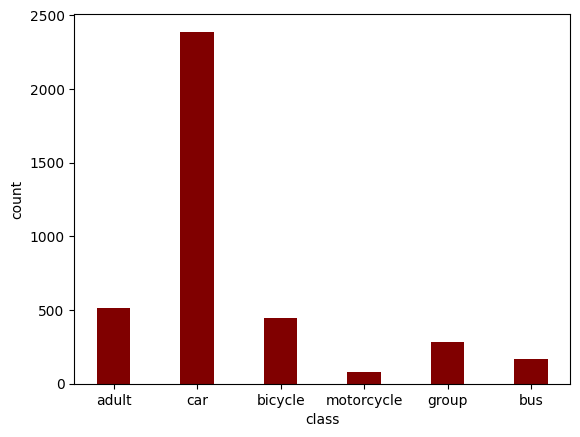

In [4]:
plt.bar(list(count_dict.keys()), list(count_dict.values()), color ='maroon', width = 0.4 )
plt.xlabel('class')
plt.ylabel('count')

In [22]:
def instance_counter(object_list):
    
    count_dict_one_scene = {
    'adult': object_list.count(1),
    'car' : object_list.count(6),
    'bicycle' : object_list.count(4),
    'motorcycle' : object_list.count(5),
    'bus' : object_list.count(7),
    }

    return count_dict_one_scene


In [23]:
stats_dict = {

}
             
for scene_number in [x for x in range(1, 26) if x not in [11, 12, 13]]:
    json_path = Path(fr'C:\Users\hussa\OneDrive\Desktop\Project\Dataset\json files for all scenes\scene {scene_number}\camera_01__annotation')
    classes_info_array_for_one_scene = []

    for json_file in json_path.iterdir():
        opened_json = open(json_file, 'r')
        json_data = json.load(opened_json)

        for items in json_data['annotations']:
            classes_info_array_for_one_scene.append(items['category_id'])
                
        

    count = instance_counter(classes_info_array_for_one_scene)    
    stats_dict[f'scener {scene_number}'] = count



{'scener 1': {'adult': 0, 'car': 0, 'bicycle': 102, 'motorcycle': 0, 'bus': 0}, 'scener 2': {'adult': 0, 'car': 147, 'bicycle': 0, 'motorcycle': 0, 'bus': 0}, 'scener 3': {'adult': 183, 'car': 0, 'bicycle': 0, 'motorcycle': 0, 'bus': 0}, 'scener 4': {'adult': 0, 'car': 80, 'bicycle': 0, 'motorcycle': 80, 'bus': 0}, 'scener 5': {'adult': 137, 'car': 42, 'bicycle': 0, 'motorcycle': 0, 'bus': 0}, 'scener 6': {'adult': 0, 'car': 159, 'bicycle': 0, 'motorcycle': 0, 'bus': 0}, 'scener 7': {'adult': 0, 'car': 64, 'bicycle': 107, 'motorcycle': 0, 'bus': 0}, 'scener 8': {'adult': 0, 'car': 183, 'bicycle': 0, 'motorcycle': 0, 'bus': 0}, 'scener 9': {'adult': 0, 'car': 246, 'bicycle': 109, 'motorcycle': 0, 'bus': 0}, 'scener 10': {'adult': 0, 'car': 445, 'bicycle': 0, 'motorcycle': 0, 'bus': 0}, 'scener 14': {'adult': 0, 'car': 141, 'bicycle': 0, 'motorcycle': 0, 'bus': 0}, 'scener 15': {'adult': 0, 'car': 264, 'bicycle': 0, 'motorcycle': 0, 'bus': 0}, 'scener 16': {'adult': 0, 'car': 83, 'bicycl

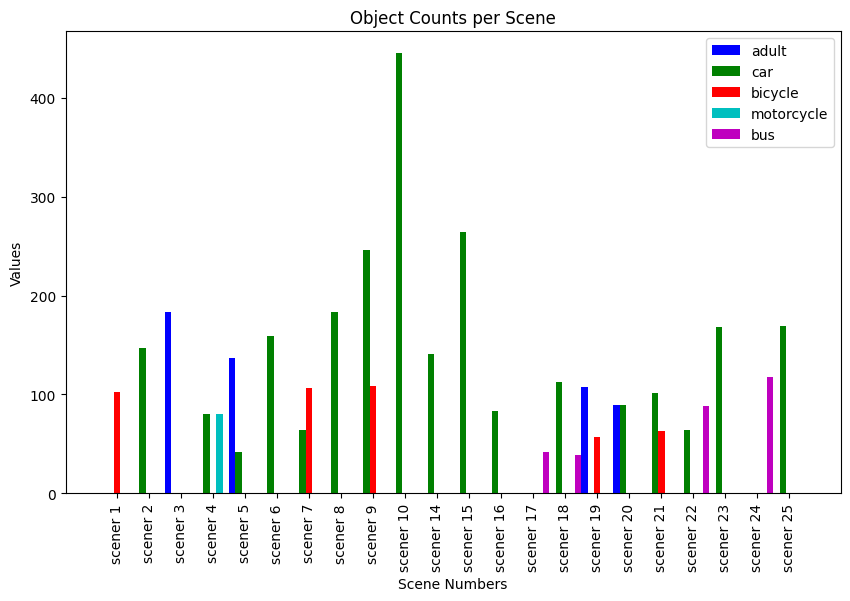

In [24]:

scene_numbers = list(stats_dict.keys())

# Extract object types and their values
objects = list(next(iter(stats_dict.values())).keys())
values = {obj: [stats_dict[scene][obj] for scene in scene_numbers] for obj in objects}

# Define the number of scenes and the width of each bar
n_scenes = len(scene_numbers)
bar_width = 0.6
group_width = bar_width * (len(objects) + 0)  # Adjust group width to add space between scenes

# Create a bar chart with a larger figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Set the positions of the bars
indices = np.arange(n_scenes) * group_width

# Colors for each object
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot each object's bars with unique color
for i, (obj, color) in enumerate(zip(objects, colors)):
    ax.bar(indices + i * bar_width, values[obj], bar_width, label=obj, color=color)

# Set the labels and title
ax.set_xlabel('Scene Numbers')
ax.set_ylabel('Values')
ax.set_title('Object Counts per Scene')
ax.set_xticks(indices + bar_width * (len(objects) - 1) / 2)
ax.set_xticklabels(scene_numbers, rotation=90)
ax.legend()

# Display the plot
plt.show()


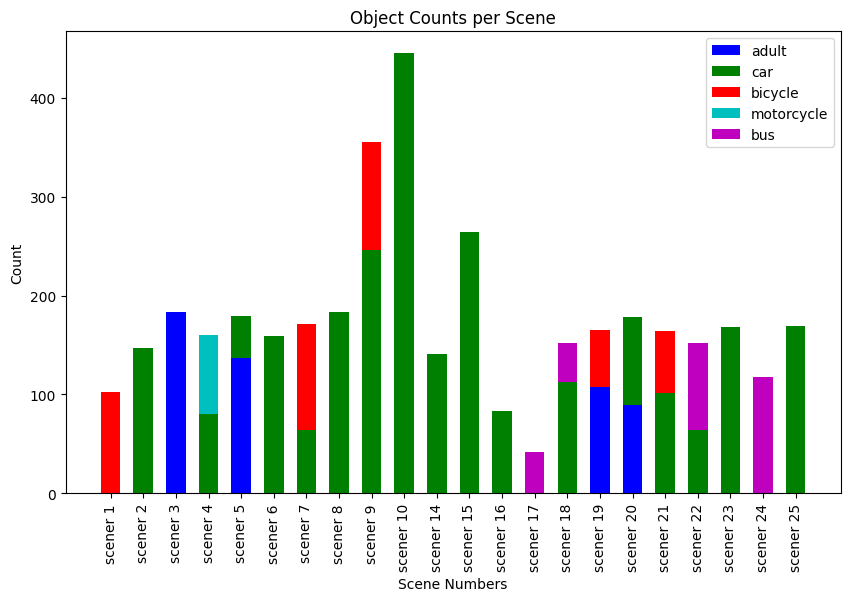

In [25]:
scene_numbers = list(stats_dict.keys())

# Extract object types and their values
objects = list(next(iter(stats_dict.values())).keys())
values = {obj: [stats_dict[scene][obj] for scene in scene_numbers] for obj in objects}

# Create a stacked bar chart with a larger figure size
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.6

# Set the positions of the bars
indices = np.arange(len(scene_numbers))

# Colors for each object
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot each object's bars stacked on top of each other
bottom_values = np.zeros(len(scene_numbers))
for i, (obj, color) in enumerate(zip(objects, colors)):
    ax.bar(indices, values[obj], bar_width, label=obj, color=color, bottom=bottom_values)
    bottom_values += np.array(values[obj])

# Set the y-axis limit with padding
ax.set_ylim(0, bottom_values.max() * 1.05)

# Set the labels and title
ax.set_xlabel('Scene Numbers')
ax.set_ylabel('Count')
ax.set_title('Object Counts per Scene')
ax.set_xticks(indices)
ax.set_xticklabels(scene_numbers, rotation=90)
ax.legend()

# Display the plot
plt.show()